# **A Classification problem.**
---

## **Abstract:**

***We have been tasked by a client to develop a Proof of Concept (PoC) that showcases a model
capable of predicting customer churn rates. The requirement is for the marketing team to interact
with the model through an LLM-powered chatbot using natural language.***

---

### **Table of Contents of the notebook:**

1. **Import Linbraries**</a>
2. **Upload the dataset**</a>
3. **Data Preperation**</a>
4. **Gaining Insights (EDA)**</a>
5. **Machine Leaning Model**</a>
6. **Choosing Best Model**</a>

### **Diagram Flow:**
You can see the flow video [here](https://drive.google.com/file/d/1_URzMVv_8YAgrOqkzNyzoq0y01E3VqFI/view?usp=sharing) and try the chatbot from [here](https://huggingface.co/spaces/a-elmetwally/chatbot)

---

# Import Libraries 

In [190]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
import lightgbm as lgb
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Upload the Data

In [191]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration 

In [192]:
df.duplicated().sum()

0

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

In [194]:
def get_unique_values(dataframe):
    unique_values = {}
    for column in dataframe.columns:
        unique_values[column] = dataframe[column].unique().tolist()
    return unique_values

In [195]:
unique = df.drop(columns=['customerID', 'Monthly_Charges', 'Total_Charges', 'tenure'])
unique_vals = get_unique_values(unique)
for column, values in unique_vals.items():
    print(f"{column}: {values}\n")

gender: ['Female', 'Male']

Senior_Citizen : [0, 1]

Is_Married: ['Yes', 'No']

Dependents: ['No', 'Yes']

Phone_Service: ['No', 'Yes']

Dual: ['No phone service', 'No', 'Yes']

Internet_Service: ['DSL', 'Fiber optic', 'No']

Online_Security: ['No', 'Yes', 'No internet service']

Online_Backup: ['Yes', 'No', 'No internet service']

Device_Protection: ['No', 'Yes', 'No internet service']

Tech_Support: ['No', 'Yes', 'No internet service']

Streaming_TV: ['No', 'Yes', 'No internet service']

Streaming_Movies: ['No', 'Yes', 'No internet service']

Contract: ['Month-to-month', 'One year', 'Two year']

Paperless_Billing: ['Yes', 'No']

Payment_Method: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

Churn: ['No', 'Yes']



In [196]:
# To use it if I need to see the percentage with the distribution of the column 
def plot_pie_chart(dataframe, column):
    # Count the unique values
    counts = dataframe[column].value_counts()
    
    plt.figure(figsize=(4, 4))
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Distribution of {column}')
    plt.show()

## Univariate Analysis
- ### Distribution of churn (Target Column)

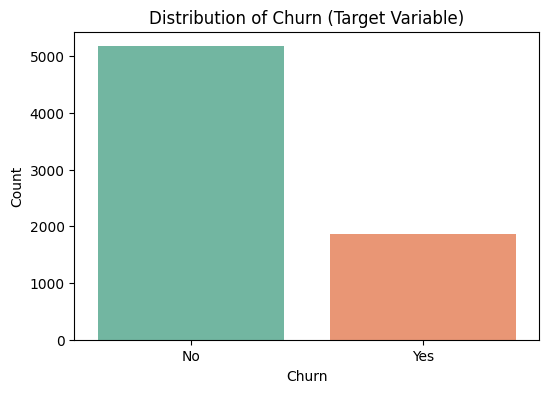

In [197]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [198]:
value_counts = df['Churn'].value_counts(normalize=True) * 100
value_counts

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

- The Target is unbalanced 

In [199]:
df.columns

Index(['customerID', 'gender', 'Senior_Citizen ', 'Is_Married', 'Dependents',
       'tenure', 'Phone_Service', 'Dual', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

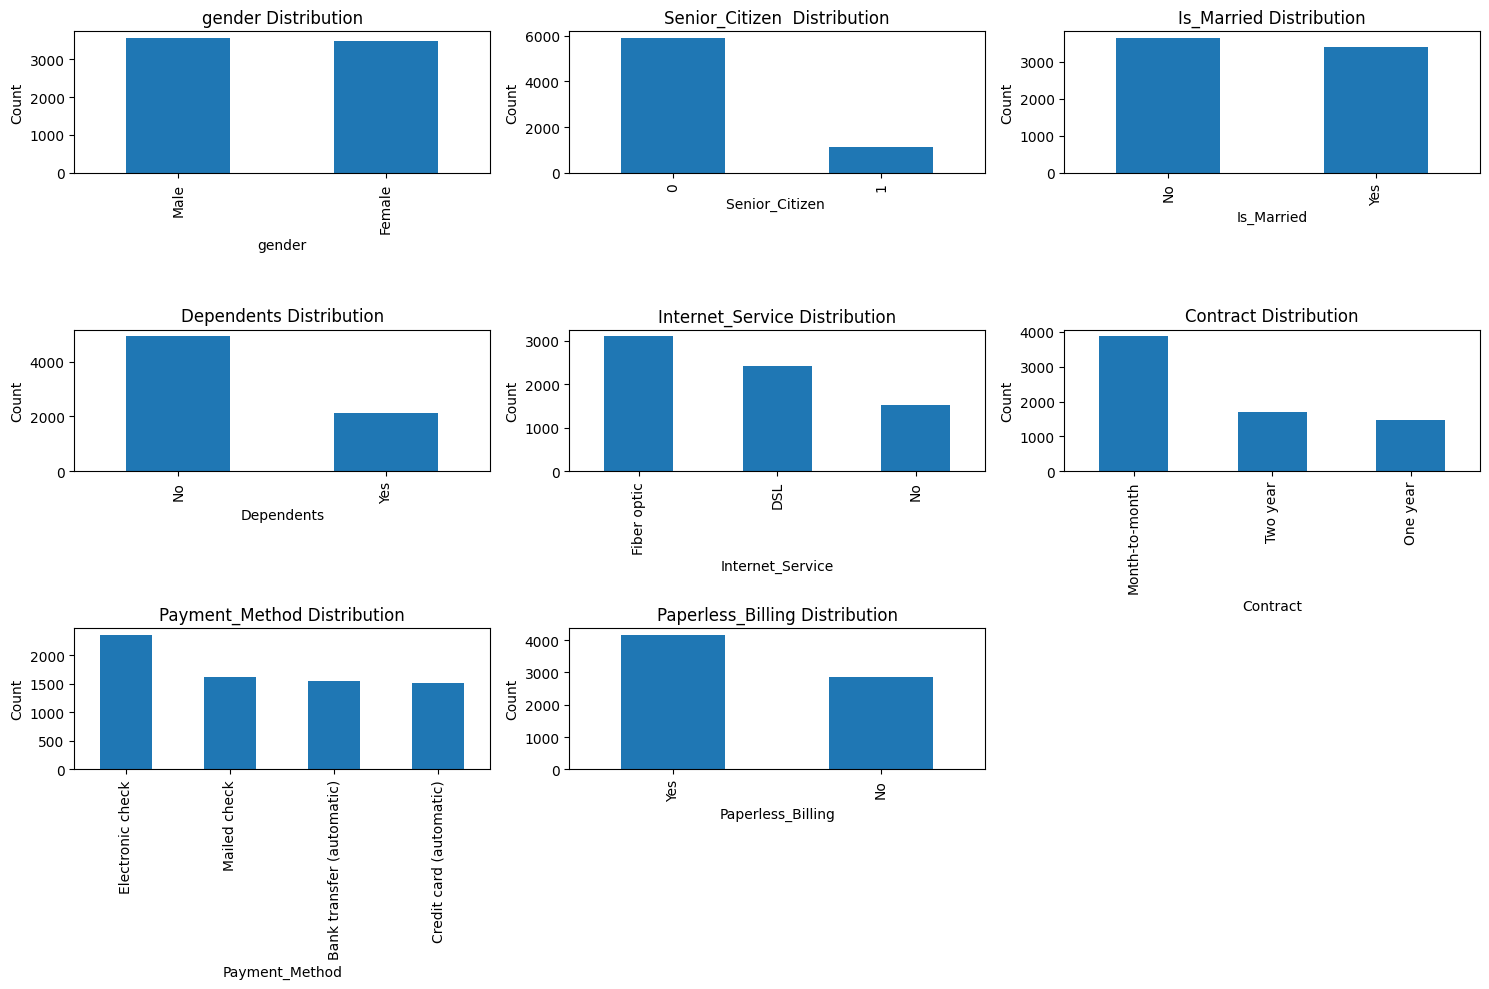

In [200]:
categorical_features = ['gender', 'Senior_Citizen ', 'Is_Married', 'Dependents',
                         'Internet_Service', 'Contract', 'Payment_Method', 'Paperless_Billing']
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], title=f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide any unused subplots if there are fewer than rows*cols features
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- *For gender column:* Balance between Female and Male 
- *For Senior_Citizen column:* Logically Distribution because the young people are more than older ones
- *For Is_Married column:* Balance between who is married and not 
- *For Dependents column:* Most clients don't have dependents 
- *For Internet_Service column:* The percentage is increasing in the use of optical fibers, and this is logical because they are faster
- *For Contract column:* Most people use Month-to-Month contract
- *For Payment_Method column:* The number of customers using Electronic check is significantly higher than any other payment method
- *For Paperless_Billing column:* Majority of customers prefer paperless billing

## Bivariate Analysis (Feature vs. Target)

- ### Gender vs Churn

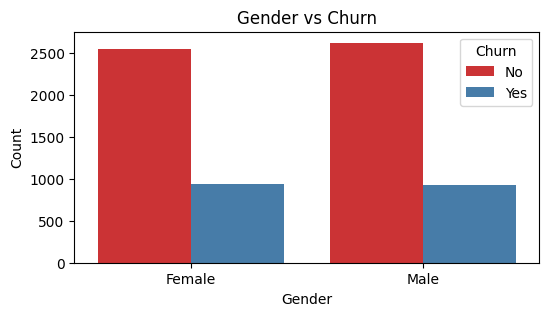

In [201]:
plt.figure(figsize=(6, 3))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

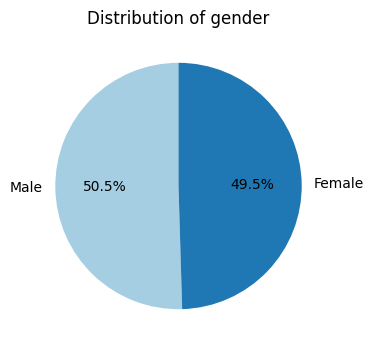

In [202]:
# Distribution of gender with percentage
plot_pie_chart(df, 'gender')

- No significant difference in churn rates between male and female customers

- ### Are all clients elderly, male or female?

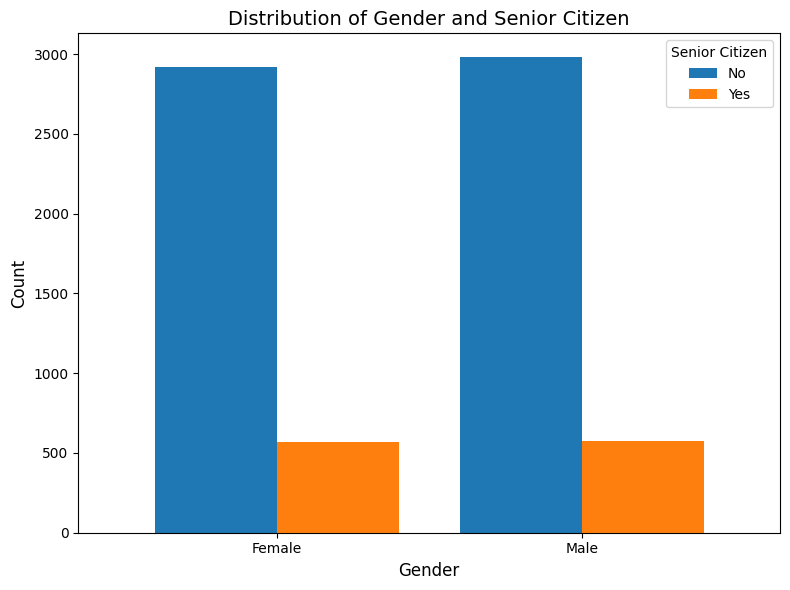

In [203]:
gender_senior_counts = df.groupby(['gender', 'Senior_Citizen ']).size().unstack()

gender_senior_counts.plot(kind='bar', figsize=(8, 6), width=0.8)

plt.title('Distribution of Gender and Senior Citizen', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Senior Citizen', labels=['No', 'Yes'], fontsize=10)
plt.tight_layout()
plt.show()

- logical distribution because senior citzens are less in number than young people

- ### Contract Type vs Churn

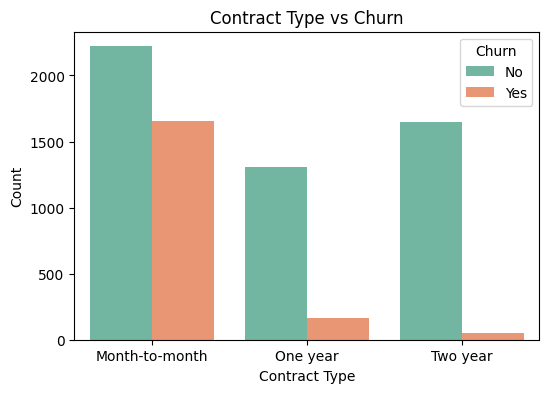

In [204]:
# Contract Type vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

- Month-to-month contracts typically have a higher churn rate than longer-term contracts (1 year or 2 years) 

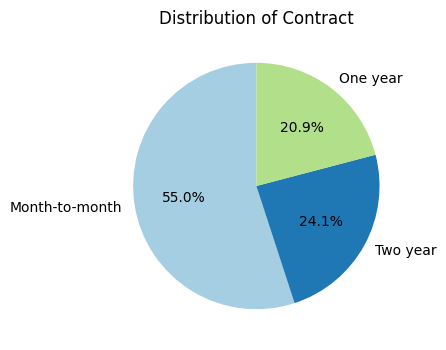

In [205]:
# Distribution of Contract type with percentage
plot_pie_chart(df, 'Contract')

- Most people use Month-to-Month contract

- ### The rest of the categorical columns with the target

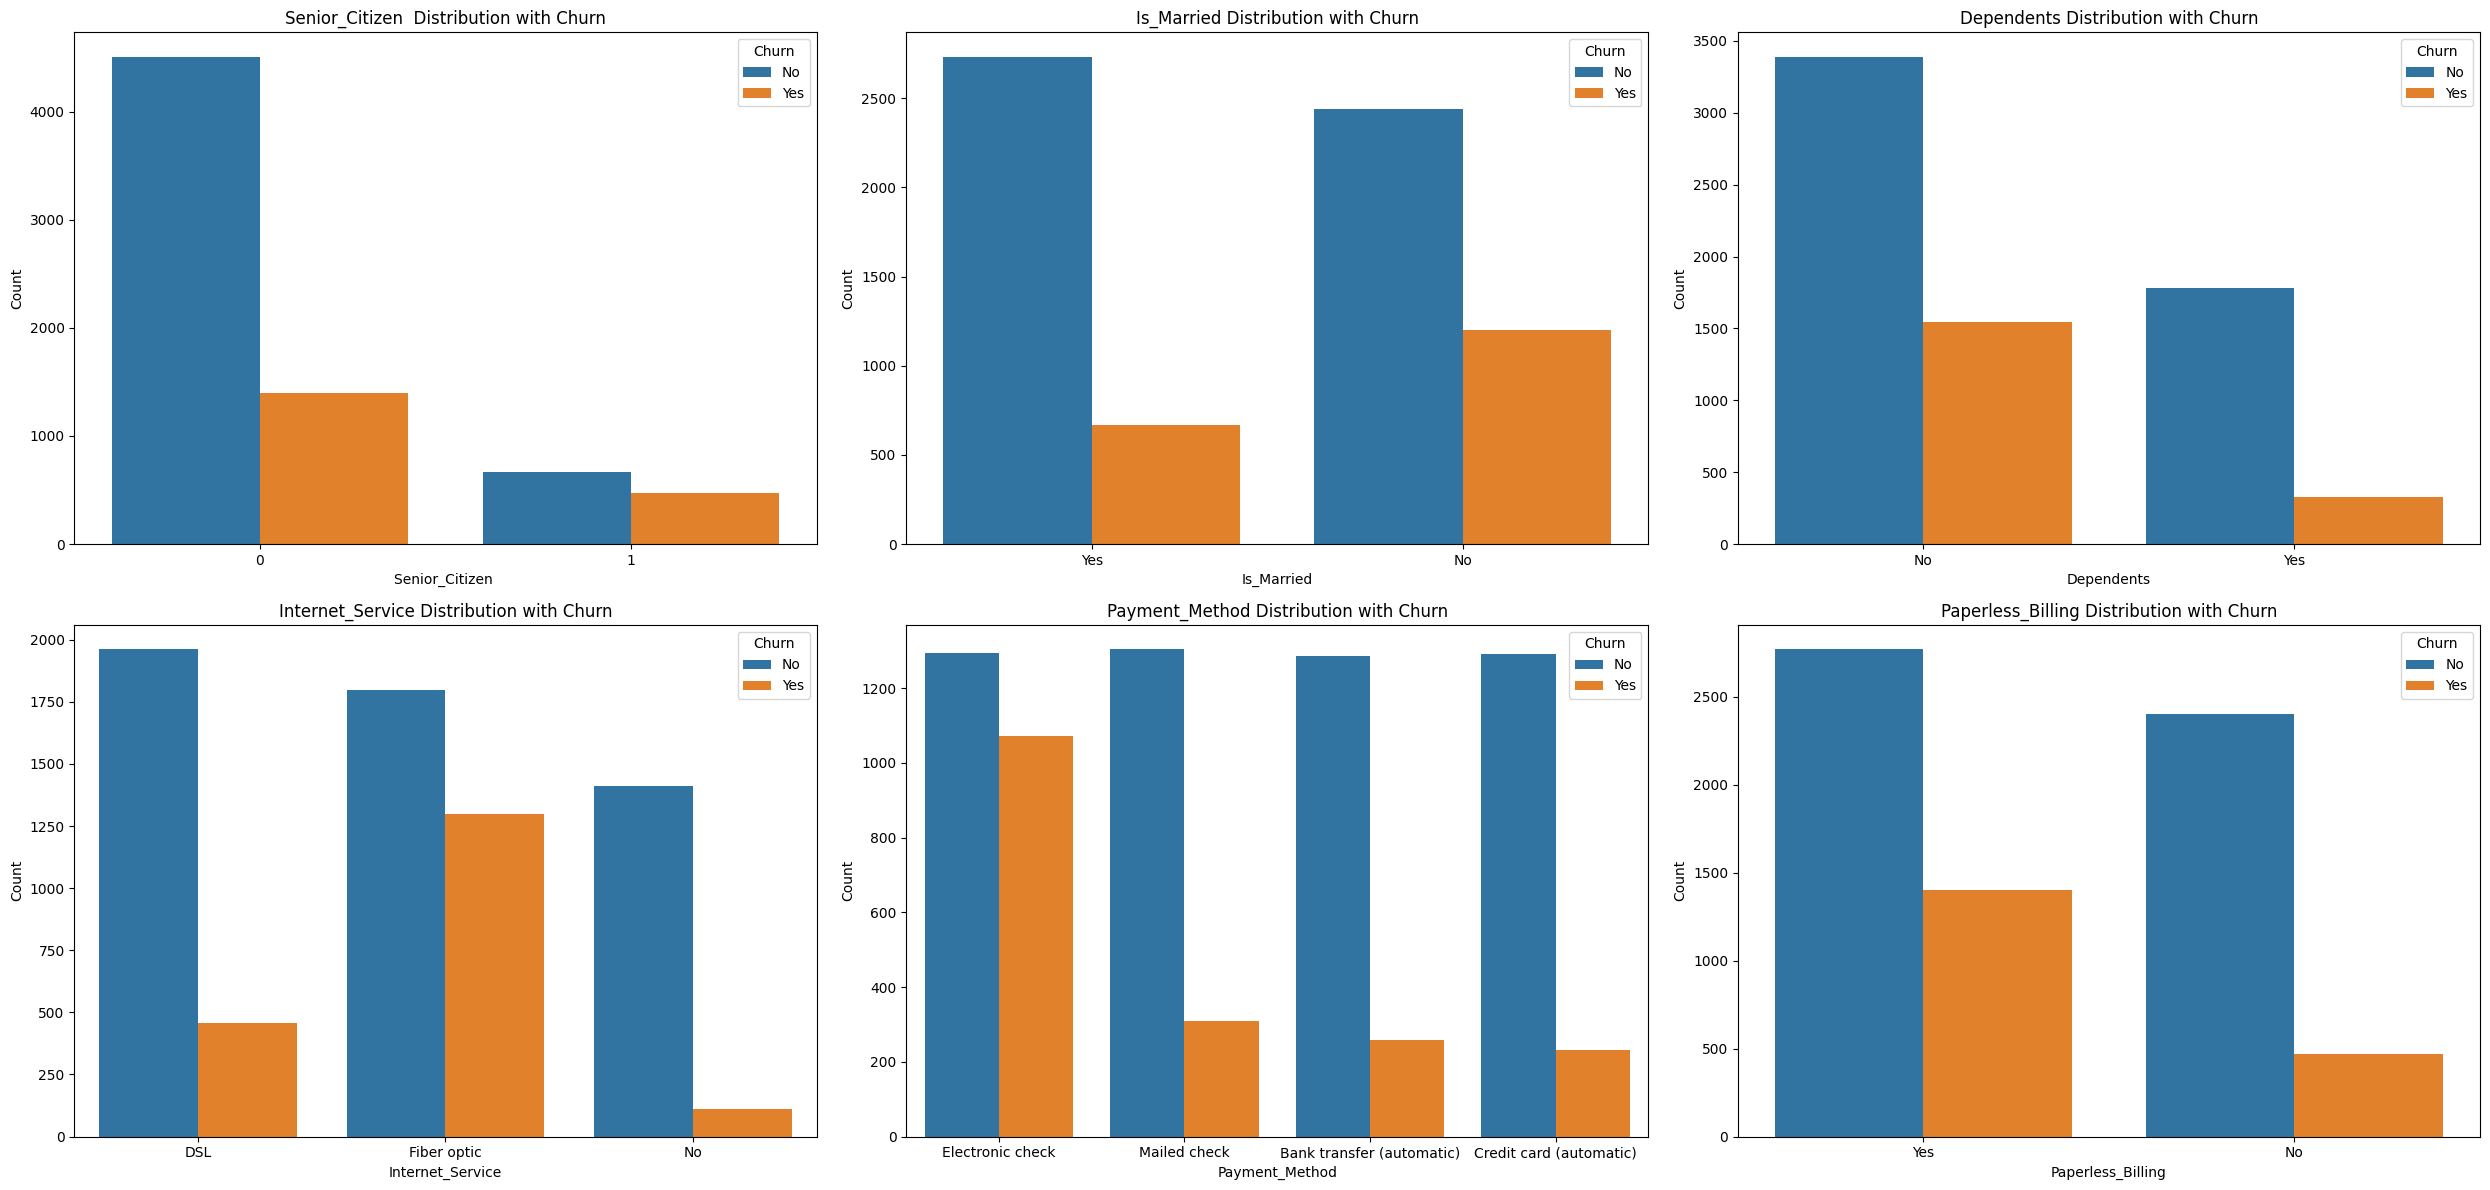

In [206]:
categorical_features = [ 'Senior_Citizen ', 'Is_Married', 'Dependents',
                         'Internet_Service', 'Payment_Method', 'Paperless_Billing']
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(25, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution with Churn')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide any unused subplots if there are fewer than rows*cols features
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

*For Senior_Citizen column:*  
- The number of senior citizens who did not churn is significantly higher than the number of senior citizens who did churn
- This suggests that being a senior citizen does not have a significant impact on churn rate

*For Is_Married column:*
- Married customers are more likely to churn than unmarried customers

*For Dependents column:* 
- Customers without dependents are more likely to churn than customers with dependents
- I believe that family stability greatly helps in stability in life and decisions in general

*For Internet_Service column:* 
- Customers with Fiber optic internet service have a higher churn rate than those with DSL or no internet service

And I think that beacause some factors like: 
- Customers who choose Fiber optic internet often have higher expectations for speed and reliability. If these expectations are not met, they may be more likely to switch to another provider
- Price Sensitivity: Fiber optic internet may be more expensive than DSL or no internet service. If customers feel that the price is not justified by the service quality, they may be more likely to churn

*For Payment_Method column*
- Customers who use Electronic check and Mailed check are more likely to churn than those who use Bank transfer (automatic) or Credit card (automatic)
- This suggests that customers who pay via Electronic check or Mailed check are more likely to discontinue their service compared to those who pay through automatic bank transfer or credit card
- Automatic Payments: Customers who use automatic payments (bank transfer or credit card) often find it more convenient as they don't have to manually pay each month

*For Priceless_Billing:* 
- Customers who opted for paperless billing are less likely to churn compared to those who did not
- Eco-Friendly Image: Service providers that offer paperless billing often position themselves as environmentally conscious companies. This can attract customers who share similar values and are more likely to stay loyal

## Numerical Features

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

- Numerical Columns must be 'tenure', 'Monthly_Charges' and 'Total_Charges' 

- I found 'Total_Charges' column type is object not numeric so I think there is some wrong data in it

In [208]:
non_numeric_rows = df[~df['Total_Charges'].str.replace('.', '', 1).str.isdigit()]
non_numeric_rows

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- There are about 11 missing values in this column 

In [209]:
# Replace non-numeric values in 'Total_Charges' with NaN
df['Total_Charges'] = df['Total_Charges'].apply(
    lambda x: x if x.replace('.', '', 1).isdigit() else np.nan
)

In [210]:
# Verify the changes
print(df['Total_Charges'].isna().sum())

11


In [211]:
df['Total_Charges'] = df['Total_Charges'].astype(float)

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'Monthly_Charges'}>],
       [<Axes: title={'center': 'Total_Charges'}>, <Axes: >]],
      dtype=object)

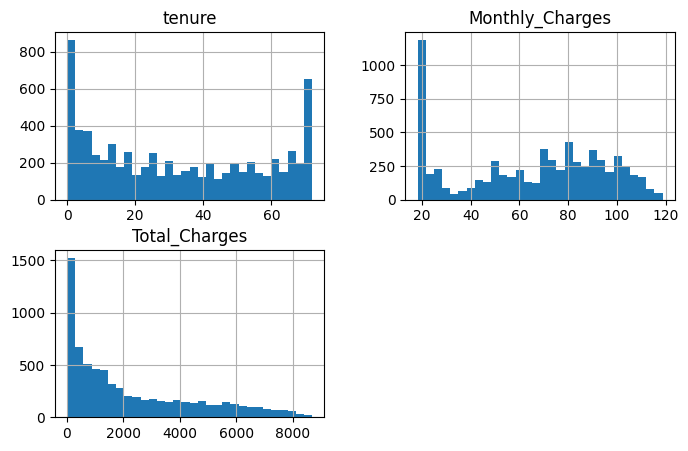

In [212]:
numerical_features = ['tenure','Monthly_Charges','Total_Charges']
df[numerical_features].hist(figsize=(8, 5), bins=30)

*For tenure column:* 
- The distribution is right-skewed, meaning there are more customers with lower tenure
- From this column I think we can see Customer Segmentation, The peaks in the tenure distribution could be used to identify customer segments based on their tenure length
- customers with longer tenures might be more loyal and less likely to churn

*For Total_Charges column:* 
- The distribution is also right-skewed, similar to tenure. This suggests that a significant portion of customers have lower total charges, while a smaller number have higher total charges
- The distribution of total charges can be used to estimate the customer lifetime value (CLTV)
- Customers with higher total charges might be more valuable to the company

*For Monthly_Charges column:* 
- The distribution is roughly uniform, indicating that customers are spread across a wide range of monthly charges

- ### Check Missing Data Distribution

In [213]:
print(df[df['Total_Charges'].isna()].describe())  # Summarize rows with missing values

       Senior_Citizen   tenure  Monthly_Charges  Total_Charges
count             11.0    11.0        11.000000            0.0
mean               0.0     0.0        41.418182            NaN
std                0.0     0.0        23.831484            NaN
min                0.0     0.0        19.700000            NaN
25%                0.0     0.0        20.125000            NaN
50%                0.0     0.0        25.750000            NaN
75%                0.0     0.0        58.975000            NaN
max                0.0     0.0        80.850000            NaN


<Axes: xlabel='Churn', ylabel='tenure'>

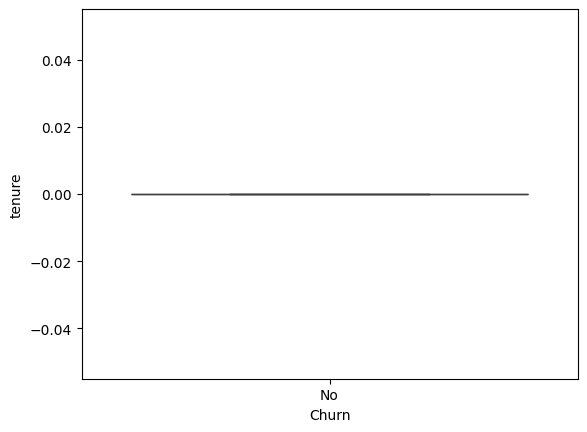

In [214]:
sns.boxplot(x='Churn', y='tenure', data=df[df['Total_Charges'].isna()])

The customers with missing Total_Charges have a tenure of 0 months. This suggests that these customers are likely new customers who have not yet incurred any charges

These customers are new and have not yet incurred any charges, imputing 0 seems like a logical choice

In [215]:
df['Total_Charges'] = df['Total_Charges'].fillna(0)

- ### Visualize Relationships with Churn

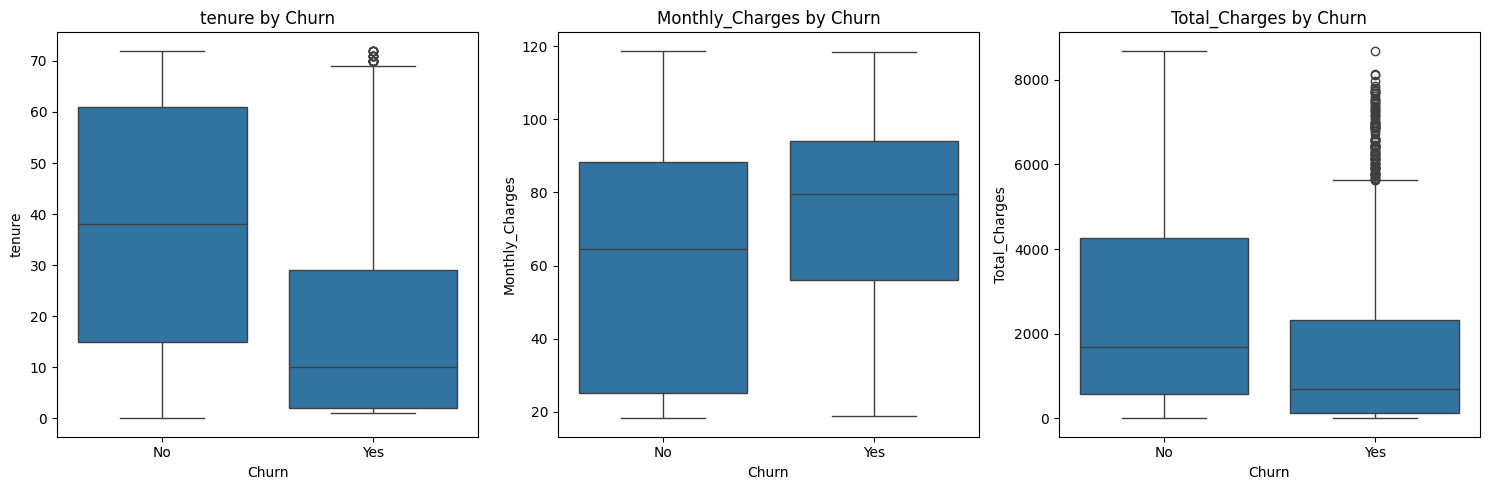

In [216]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

*For tenure column:*
- Customers who churned have a significantly lower median tenure compared to those who did not. This suggests that customers with shorter tenures are more likely to churn
- There are some ***outliers*** in both groups, particularly for customers who did not churn. These could be long-term loyal customers or customers with specific contracts
- Tenure appears to be a strong predictor of churn. Customers with shorter tenures are more likely to churn

*For Monthly_Charges column:* 
- There seems to be a slight difference in median monthly charges between churned and non-churned customers. However, the range of monthly charges is quite similar for both groups
- While there is a slight difference in median monthly charges between churned and non-churned customers, it's not a significant factor

*For Total_Charges column:*
- Similar to monthly charges, there is a slight difference in the median total charges between churned and non-churned customers
- There are many ***outliers*** in both groups, especially for customers who did not churn. This suggests that a significant portion of customers have relatively low total charges, while a smaller number have very high total charges
- Similar to monthly charges, total charges do not seem to be a strong predictor of churn

- ### Check Ouliers

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Senior_Citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Monthly_Charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Total_Charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [218]:
# Calculate IQR
Q1 = df['Total_Charges'].quantile(0.25)
Q3 = df['Total_Charges'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Total_Charges'] < lower_bound) | (df['Total_Charges'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print("Percentage of outliers:", percentage_outliers)

Percentage of outliers: 0.0


In [219]:
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Min Value:", df['Total_Charges'].min())
print("Max Value:", df['Total_Charges'].max())

Lower Bound: -4683.525
Upper Bound: 8868.675
Min Value: 0.0
Max Value: 8684.8


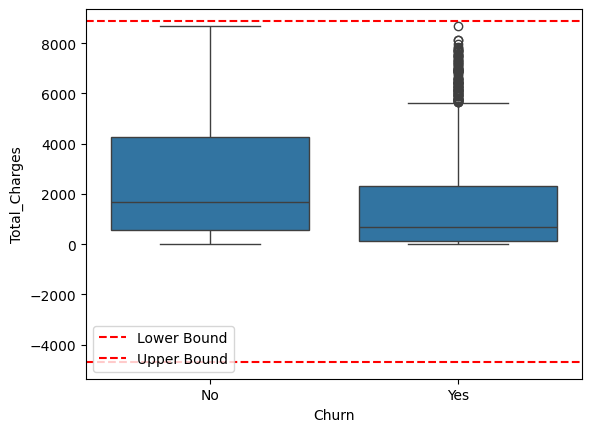

In [220]:
sns.boxplot(x='Churn', y='Total_Charges', data=df)
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [221]:
high_values = df[df['Total_Charges'] > 8000]
print(len(high_values))

78


In [222]:
# Filter the dataset where Churn is 'Yes'
churn_yes_df = df[df['Churn'] == 'Yes']

Q1 = churn_yes_df['Total_Charges'].quantile(0.25)
Q3 = churn_yes_df['Total_Charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_churn_yes = churn_yes_df[(churn_yes_df['Total_Charges'] < lower_bound) | (churn_yes_df['Total_Charges'] > upper_bound)]

# Calculate the percentage of outliers in the filtered dataset
percentage_outliers_churn_yes = (len(outliers_churn_yes) / len(churn_yes_df)) * 100

# Display the results
print("Number of outliers when Churn is 'Yes':", len(outliers_churn_yes))
print("Percentage of outliers when Churn is 'Yes':", percentage_outliers_churn_yes)
print(outliers_churn_yes[['tenure','Monthly_Charges', 'Total_Charges']]) 


Number of outliers when Churn is 'Yes': 109
Percentage of outliers when Churn is 'Yes': 5.831995719636169
      tenure  Monthly_Charges  Total_Charges
104       68           110.00        7611.85
339       63           103.40        6603.00
402       69            99.45        7007.60
445       60           105.90        6396.45
609       65           105.25        6786.40
...      ...              ...            ...
6785      61           111.60        6876.05
6853      54           111.10        6014.85
6945      70            98.30        6859.50
6972      56           111.95        6418.90
7034      67           102.95        6886.25

[109 rows x 3 columns]


- Outliers Percentage: The percentage of outliers when Churn is "Yes" is around 5.83%, which is relatively ***low***
- The outliers are customers with very high Total_Charges. ***These might represent long-term or high-spending customers who have churned***
- These outliers might contain valuable information about why high-spending customers churned, which could be critical for the analysis
- ***They could represent real customer behavior***

# Data Preprocessing 

- ## Split the Data 

Here I will split the data with taking into consideration the imbalanced target

In [223]:
# Split the data into train+validation and test sets (80% train+validation, 20% test)
train_val_df, test_df = train_test_split(df, test_size=0.2,
                                          stratify=df['Churn'], random_state=42)

# split the train+validation set into training (70%) and validation (30%)
train_df, val_df = train_test_split(train_val_df, test_size=0.3, 
                                    stratify=train_val_df['Churn'], random_state=42)

In [224]:
# Check the proportions in each subset
print("Target distribution in original data:")
print(df['Churn'].value_counts(normalize=True) * 100)

print("\nTarget distribution in training data:")
print(train_df['Churn'].value_counts(normalize=True) * 100)

print("\nTarget distribution in validation data:")
print(val_df['Churn'].value_counts(normalize=True) * 100)

print("\nTarget distribution in test data:")
print(test_df['Churn'].value_counts(normalize=True) * 100)

Target distribution in original data:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Target distribution in training data:
Churn
No     73.471976
Yes    26.528024
Name: proportion, dtype: float64

Target distribution in validation data:
Churn
No     73.447664
Yes    26.552336
Name: proportion, dtype: float64

Target distribution in test data:
Churn
No     73.456352
Yes    26.543648
Name: proportion, dtype: float64


In [225]:
train_df.shape, val_df.shape ,test_df.shape

((3943, 21), (1691, 21), (1409, 21))

In [226]:
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop = True, inplace=True)

- ## Transformation 

From Histogram of Total_charges column we found the right skewness so we should handle with it beacuse the skewness affect the linear models 

In [227]:
skewness = df['Total_Charges'].skew()
print("Skewness:", skewness)

Skewness: 0.963234654832277


Moderately skewed: If skewness is between -1 and -0.5 or 0.5 and 1

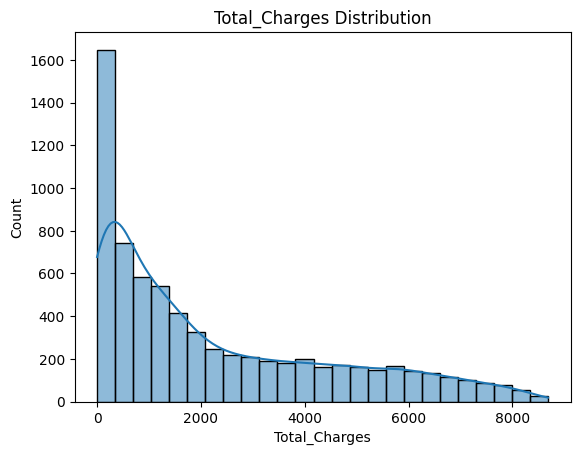

In [228]:
# See the distribution information
sns.histplot(df['Total_Charges'], kde=True)
plt.title('Total_Charges Distribution')
plt.show()

In [229]:
# To check the Presence of Zero to choose the best transformation type
print("Min value in Total_Charges:", df['Total_Charges'].min())


Min value in Total_Charges: 0.0


So I will use Logarithmic Transformation beacause This transformation will compress larger values and help normalize the distribution

- It's intuitive for monetary data, as percentages and ratios are easier to interpret in a logarithmic scale

In [230]:
# Apply log transformation to each set
train_df['Total_Charges'] = np.log(train_df['Total_Charges'] + 1)
val_df['Total_Charges'] = np.log(val_df['Total_Charges'] + 1)
test_df['Total_Charges'] = np.log(test_df['Total_Charges'] + 1)

- ### Drop ID 

To avoid Data Leakage, I must drop this column

In [231]:
train_df = train_df.drop(columns=['customerID'])
test_df = test_df.drop(columns=['customerID'])
val_df = val_df.drop(columns=['customerID'])

- ## Encoding

In [232]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3943 non-null   object 
 1   Senior_Citizen     3943 non-null   int64  
 2   Is_Married         3943 non-null   object 
 3   Dependents         3943 non-null   object 
 4   tenure             3943 non-null   int64  
 5   Phone_Service      3943 non-null   object 
 6   Dual               3943 non-null   object 
 7   Internet_Service   3943 non-null   object 
 8   Online_Security    3943 non-null   object 
 9   Online_Backup      3943 non-null   object 
 10  Device_Protection  3943 non-null   object 
 11  Tech_Support       3943 non-null   object 
 12  Streaming_TV       3943 non-null   object 
 13  Streaming_Movies   3943 non-null   object 
 14  Contract           3943 non-null   object 
 15  Paperless_Billing  3943 non-null   object 
 16  Payment_Method     3943 

In [233]:
unique = train_df.drop(columns=[ 'Monthly_Charges', 'Total_Charges', 'tenure', 'Senior_Citizen '])
unique_vals = get_unique_values(unique)
for column, values in unique_vals.items():
    print(f"{column}: {values}\n")

gender: ['Female', 'Male']

Is_Married: ['No', 'Yes']

Dependents: ['No', 'Yes']

Phone_Service: ['Yes', 'No']

Dual: ['No', 'Yes', 'No phone service']

Internet_Service: ['DSL', 'Fiber optic', 'No']

Online_Security: ['No', 'Yes', 'No internet service']

Online_Backup: ['No', 'Yes', 'No internet service']

Device_Protection: ['No', 'Yes', 'No internet service']

Tech_Support: ['No', 'Yes', 'No internet service']

Streaming_TV: ['No', 'Yes', 'No internet service']

Streaming_Movies: ['No', 'Yes', 'No internet service']

Contract: ['Month-to-month', 'One year', 'Two year']

Paperless_Billing: ['No', 'Yes']

Payment_Method: ['Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)', 'Electronic check']

Churn: ['No', 'Yes']



Label Encoding is perfect for: 

- ***Binary Categorical Variables*** like 'Male'/'Female', 'Yes'/'No', etc..
- ***Ordinal Data*** like 'Low', 'Medium', 'High' — so they have an inherent order

One Hot Encoding is perfect for: 
- ***Nominal categorical variables*** (no inherent order) like 'Payment_Method', 'Internet_Service', 'Contract', etc
- Prevents the model from mistakenly interpreting categories as ordinal

- ### Label Encoding 

I will use Label Encoding on:

- Gender
- Is_Married
- Dependents
- Phone_Service
- Paperless_Billing
- Churn

In [234]:
label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'Is_Married', 'Dependents', 'Phone_Service',
                      'Paperless_Billing', 'Churn']

In [235]:
# Fit the encoder only on the training dataset
for column in columns_to_encode:
    label_encoder.fit(train_df[column])  # Fit only on train 
    
    # Now apply the encoder on train, validation, and test 
    train_df[column] = label_encoder.transform(train_df[column])
    val_df[column] = label_encoder.transform(val_df[column])
    test_df[column] = label_encoder.transform(test_df[column])

- ### One Hot Encoding

I will use One-Hot Encoding on:

- Dual
- Internet_Service
- Online_Security
- Online_Backup
- Device_Protection
- Tech_Support
- Streaming_TV
- Streaming_Movies
- Contract
- Payment_Method

One-Hot Encoding for the columns Online_Security, Online_Backup, Device_Protection, Tech_Support, Streaming_TV, and Streaming_Movies because These columns have three possible values to represent nominal categorical variables that have more than two values with no inherent order

In [236]:
train_df.isnull().sum()

gender               0
Senior_Citizen       0
Is_Married           0
Dependents           0
tenure               0
Phone_Service        0
Dual                 0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn                0
dtype: int64

In [238]:
train_df.head(10)

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,0,0,0,0,1,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Bank transfer (automatic),44.15,3.809990,0
1,1,0,1,0,13,1,Yes,DSL,No,No,Yes,No,Yes,Yes,One year,1,Mailed check,75.30,6.898159,1
2,0,0,0,0,23,1,No,DSL,No,No,Yes,No,No,No,Month-to-month,0,Credit card (automatic),49.70,6.986797,0
3,1,0,1,0,71,1,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),86.10,8.707301,0
4,1,0,1,0,53,1,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,One year,0,Bank transfer (automatic),97.75,8.525994,0
5,0,0,0,0,1,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,69.95,4.261975,1
6,1,0,1,0,71,1,No,DSL,Yes,No,No,Yes,No,No,Two year,0,Bank transfer (automatic),54.50,8.237268,0
7,1,0,0,0,6,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,20.60,4.767289,0
8,0,0,1,1,39,1,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,1,Bank transfer (automatic),81.50,8.041831,0
9,0,0,0,0,6,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Credit card (automatic),19.70,4.871756,0


In [239]:
one_hot_columns = [
    'Dual', 'Internet_Service', 'Online_Security', 'Online_Backup',
    'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Contract',
    'Payment_Method', 'Streaming_Movies'
]

In [240]:
# one_hot_columns = ['Streaming_Movies', 'Internet_Service']
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(train_df[one_hot_columns])

train_one_hot_encoded = one_hot_encoder.transform(train_df[one_hot_columns]).toarray()
val_one_hot_encoded = one_hot_encoder.transform(val_df[one_hot_columns]).toarray()
test_one_hot_encoded = one_hot_encoder.transform(test_df[one_hot_columns]).toarray()

# Creating DataFrames for one hot encoded columns
train_one_hot_encoded_df = pd.DataFrame(train_one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))
val_one_hot_encoded_df = pd.DataFrame(val_one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))
test_one_hot_encoded_df = pd.DataFrame(test_one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

# Combining with the original DataFrames
train_df = train_df.drop(columns=one_hot_columns)
val_df = val_df.drop(columns=one_hot_columns)
test_df = test_df.drop(columns=one_hot_columns)

train_df= pd.concat([train_df, train_one_hot_encoded_df], axis=1)
val_df = pd.concat([val_df, val_one_hot_encoded_df], axis=1) 
test_df = pd.concat([test_df, test_one_hot_encoded_df], axis=1)

In [241]:
train_df.head(10)

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Dual_No,Dual_No phone service,Dual_Yes,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No,Streaming_TV_No internet service,Streaming_TV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes
0,0,0,0,0,1,1,0,44.15,3.809990,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,1,0,13,1,1,75.30,6.898159,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0,0,0,23,1,0,49.70,6.986797,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,1,0,71,1,1,86.10,8.707301,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,0,53,1,0,97.75,8.525994,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,0,0,0,1,1,1,69.95,4.261975,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,1,0,1,0,71,1,0,54.50,8.237268,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1,0,0,0,6,1,0,20.60,4.767289,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0,0,1,1,39,1,1,81.50,8.041831,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0,0,0,0,6,1,0,19.70,4.871756,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [242]:
train_df.shape, val_df.shape, test_df.shape

((3943, 41), (1691, 41), (1409, 41))

In [244]:
train_df.isnull().sum()

gender                                      0
Senior_Citizen                              0
Is_Married                                  0
Dependents                                  0
tenure                                      0
Phone_Service                               0
Paperless_Billing                           0
Monthly_Charges                             0
Total_Charges                               0
Churn                                       0
Dual_No                                     0
Dual_No phone service                       0
Dual_Yes                                    0
Internet_Service_DSL                        0
Internet_Service_Fiber optic                0
Internet_Service_No                         0
Online_Security_No                          0
Online_Security_No internet service         0
Online_Security_Yes                         0
Online_Backup_No                            0
Online_Backup_No internet service           0
Online_Backup_Yes                 

- ## Feature Selection and Correlation Matrix

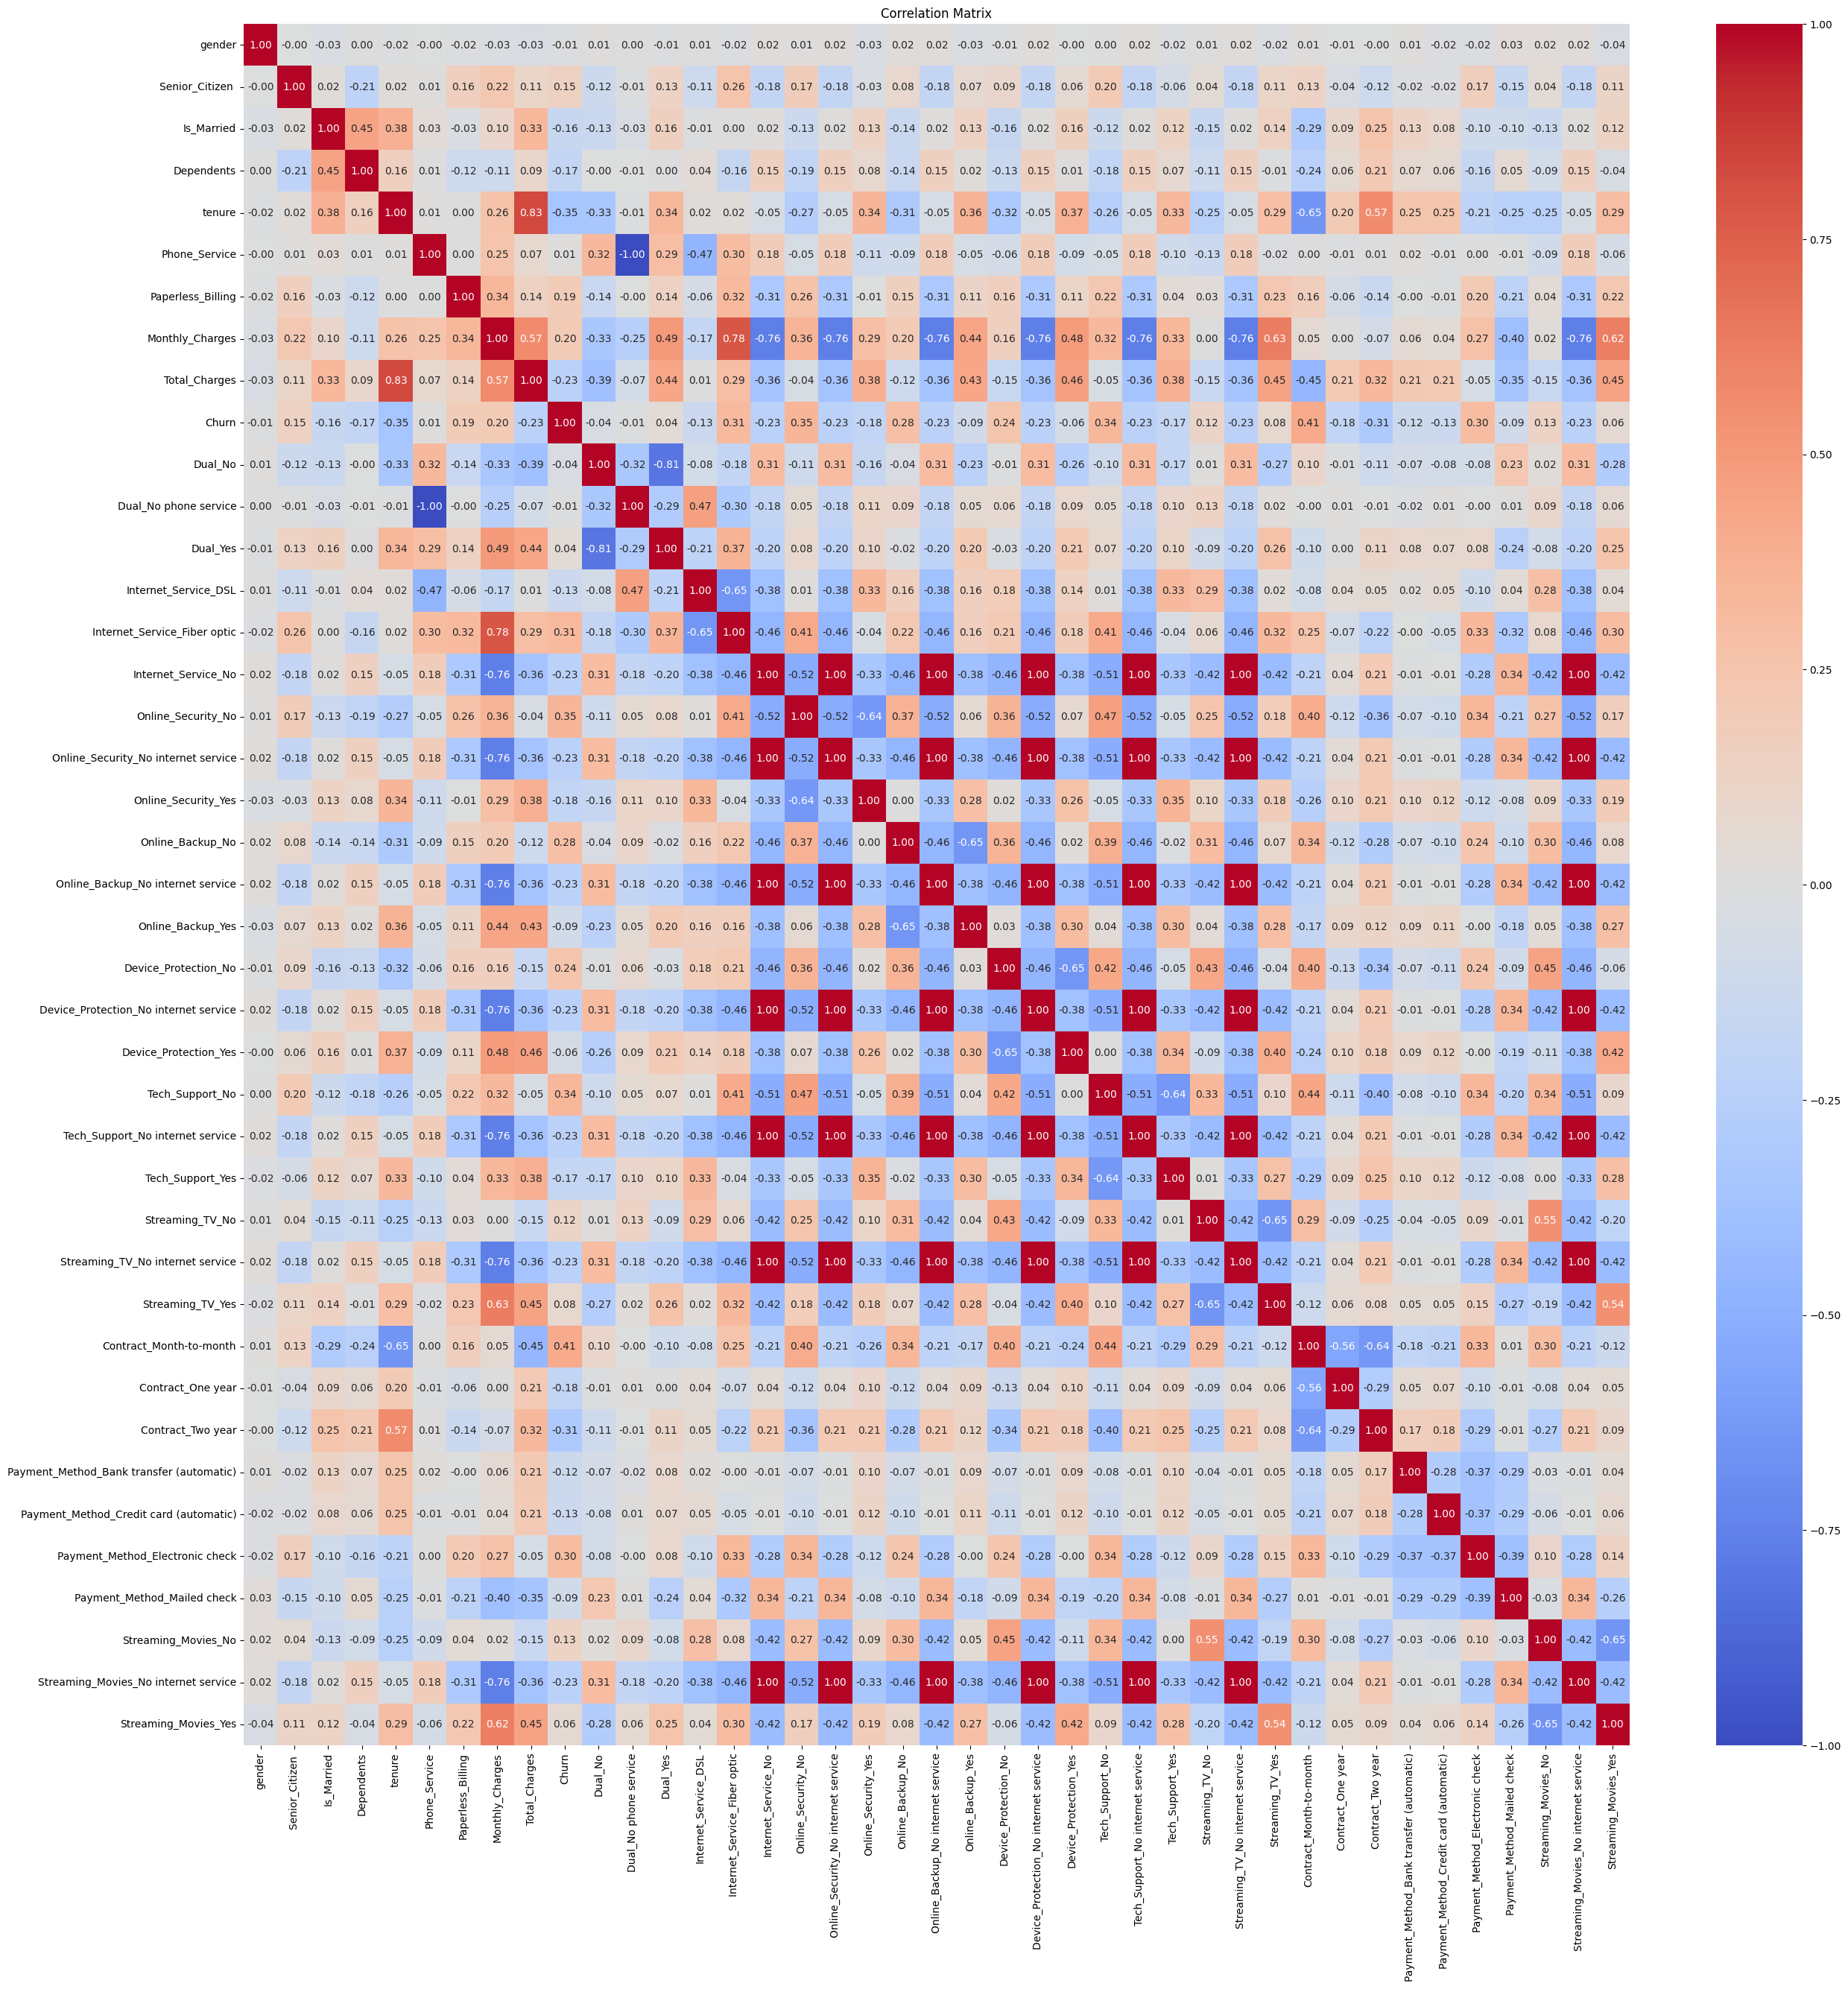

In [245]:
# Compute correlation matrix
correlation_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

From the Correlation matrix we noticed that (No Internet services are duplicated in some features in our data so keep one of them is enough)

In [246]:
columns_to_drop = ['Online_Security_No internet service', 'Online_Backup_No internet service', 'Device_Protection_No internet service', 'Tech_Support_No internet service',
                   'Streaming_TV_No internet service', 'Streaming_Movies_No internet service']
train_df = train_df.drop(columns=columns_to_drop)
val_df =val_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

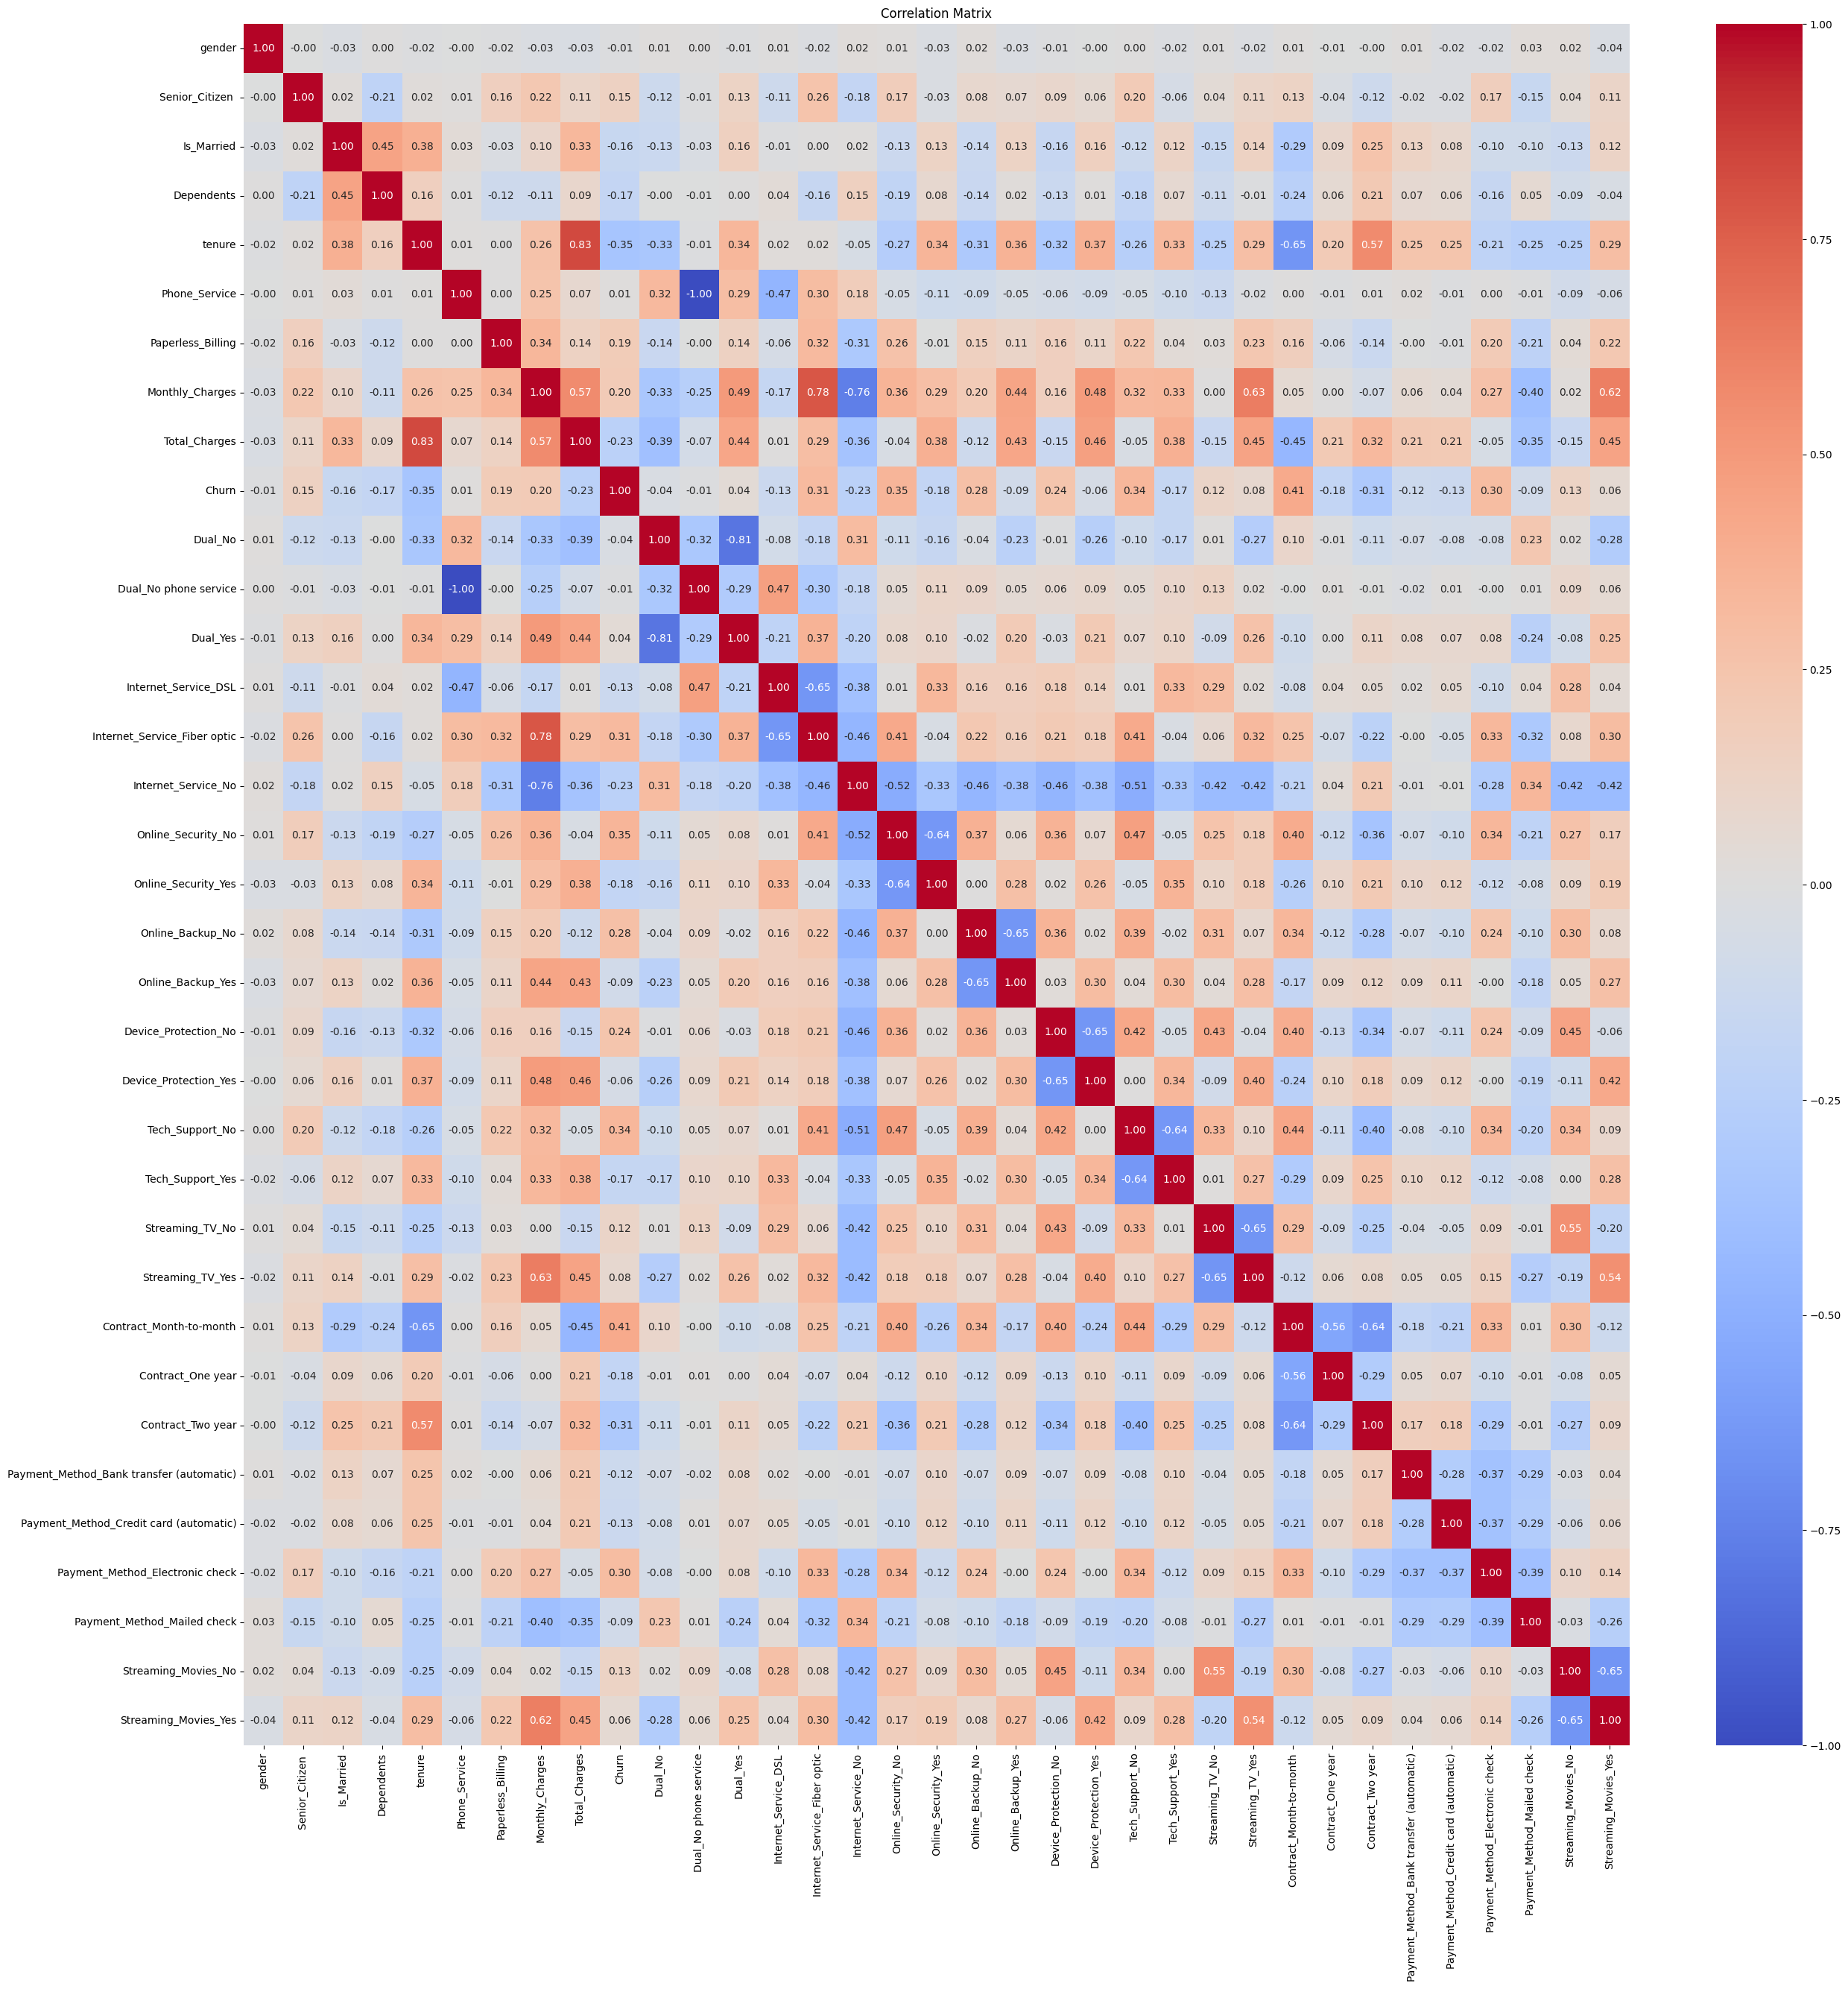

In [247]:
# Compute correlation matrix again
correlation_matrix = train_df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [248]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender                                    3943 non-null   int32  
 1   Senior_Citizen                            3943 non-null   int64  
 2   Is_Married                                3943 non-null   int32  
 3   Dependents                                3943 non-null   int32  
 4   tenure                                    3943 non-null   int64  
 5   Phone_Service                             3943 non-null   int32  
 6   Paperless_Billing                         3943 non-null   int32  
 7   Monthly_Charges                           3943 non-null   float64
 8   Total_Charges                             3943 non-null   float64
 9   Churn                                     3943 non-null   int32  
 10  Dual_No                             

# Modeling

In [249]:
# For train
X_train = train_df.drop(columns=['Churn'])  # Drop the target column 'Churn'
y_train = train_df['Churn']  # The target column

# For validation
X_val = val_df.drop(columns=['Churn']) 
y_val = val_df['Churn']

# For test
X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn'] 

In [251]:
value_counts = y_train.value_counts(normalize=True) * 100
value_counts

Churn
0    73.471976
1    26.528024
Name: proportion, dtype: float64

Here if you remember, we have imbalanced dataset so I will use class weights technique to handle with imbalanced target 

Also always we will evaluate with ***macro average f1 score*** if we care for both precision and recall 
but in this problem, we can care more about ***recall*** to identify as many churners as possible to take action before they leave (e.g., send retention offers)

- ## Logistic Regression (Baseline Model)

In [252]:
class_weights = {0: 1 / 0.73471976, 1: 1 / 0.26528024}

In [253]:
# Initialize the logistic regression model
log_reg = LogisticRegression(class_weight=class_weights)

# Train the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.3610631623681932, 1: 3.769598519663583})

In [254]:
y_pred = log_reg.predict(X_val)

In [255]:
# Confusion matrix (validation only)
val_cm = confusion_matrix(y_val, y_pred)

# Classification report (validation only)
val_report = classification_report(y_val, y_pred)

print(f"Validation Confusion Matrix:\n{val_cm}")
print(f"Validation Classification Report:\n{val_report}")


Validation Confusion Matrix:
[[936 306]
 [ 98 351]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1242
           1       0.53      0.78      0.63       449

    accuracy                           0.76      1691
   macro avg       0.72      0.77      0.73      1691
weighted avg       0.81      0.76      0.77      1691



Precision-Recall Trade-off:

- For class 0 (majority class): the precision is quite high (0.91), but the recall is lower (0.75). This indicates the model is better at identifying true positives for class 0 (No churn), but it misses some true instances (false negatives).
- For class 1 (minority class), the recall is relatively high (0.78), but precision is lower (0.53). This suggests the model identifies many true instances of class 1, but also incorrectly labels a significant number of 0 as 1 (false positives).

The model seems to be doing well with class 1 (churn prediction), but there's still room for improvement, especially in precision

So Now I will apply grid search 

In [256]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver types
    'max_iter': [100, 200, 300]  # Number of iterations
}

In [257]:
# Initialize logistic regression with class weights
log_reg = LogisticRegression(class_weight=class_weights)

# Set up GridSearchCV with macro avg F1-score as the scoring metric
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation F1 Macro Score: ", grid_search.best_score_)

Best Parameters:  {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation F1 Macro Score:  0.7306734686898301


In [258]:
# Best model from grid search
best_model = grid_search.best_estimator_ 

# Make predictions on validation set
y_pred = best_model.predict(X_val)

# Evaluate model performance
val_accuracy = accuracy_score(y_val, y_pred)
val_report = classification_report(y_val, y_pred)

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Classification Report:\n{val_report}")

Validation Accuracy: 0.7681845062093435
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1242
           1       0.54      0.77      0.64       449

    accuracy                           0.77      1691
   macro avg       0.72      0.77      0.73      1691
weighted avg       0.81      0.77      0.78      1691



- ## Decision Tree 

In [259]:
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [260]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [261]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation F1 Macro Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation F1 Macro Score:  0.7058666963157011


In [262]:
# Best model from grid search
best_dt_model = grid_search.best_estimator_

# Predict on validation set
y_pred = best_dt_model.predict(X_val)

# Evaluation
val_accuracy = accuracy_score(y_val, y_pred)
val_report = classification_report(y_val, y_pred)

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Classification Report:\n{val_report}")

Validation Accuracy: 0.7433471318746304
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1242
           1       0.51      0.78      0.62       449

    accuracy                           0.74      1691
   macro avg       0.71      0.75      0.71      1691
weighted avg       0.80      0.74      0.76      1691



- ### Random Forest

In [263]:
# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [264]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],   # Number of trees
    'max_depth': [None, 10, 20, 30],         # Max depth of trees
    'min_samples_split': [2, 5, 10],         # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Min samples at a leaf node
    'criterion': ['gini', 'entropy']        # Impurity criterion
}

In [265]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation F1 Macro Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation F1 Macro Score:  0.7444112629902475


In [266]:
# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on validation set
y_pred = best_rf_model.predict(X_val)

# Evaluation
val_accuracy = accuracy_score(y_val, y_pred)
val_report = classification_report(y_val, y_pred)

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Classification Report:\n{val_report}")

Validation Accuracy: 0.7865168539325843
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1242
           1       0.59      0.62      0.61       449

    accuracy                           0.79      1691
   macro avg       0.73      0.73      0.73      1691
weighted avg       0.79      0.79      0.79      1691



- ### Gradient Boosting

In [267]:
gb_model = GradientBoostingClassifier(random_state=42)

In [268]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
}

In [269]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation F1 Macro Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation F1 Macro Score:  0.7280339895091767


In [270]:
# Best model from grid search
best_gb_model = grid_search.best_estimator_

# Predict on validation set
y_pred = best_gb_model.predict(X_val)

# Evaluation
val_accuracy = accuracy_score(y_val, y_pred)
val_report = classification_report(y_val, y_pred)

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Classification Report:\n{val_report}")

Validation Accuracy: 0.8072146658781786
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1242
           1       0.69      0.50      0.58       449

    accuracy                           0.81      1691
   macro avg       0.76      0.71      0.73      1691
weighted avg       0.80      0.81      0.80      1691



- ### XGBoost

In [271]:
scale_pos_weight = len(y_train) / (2 * sum(y_train == 1))

# Initialize XGBoost with the calculated scale_pos_weight
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

In [272]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
}

In [273]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation: ", grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation:  0.7246251993620415


In [274]:
# Best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on validation set
y_val_pred = best_xgb_model.predict(X_val)

# Evaluation
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Classification Report:\n{val_report}")

Validation Accuracy: 0.7847427557658191
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1242
           1       0.58      0.71      0.64       449

    accuracy                           0.78      1691
   macro avg       0.73      0.76      0.74      1691
weighted avg       0.80      0.78      0.79      1691



In [ ]:
# For trying the model on test data later
X_test_best = X_test.copy()
y_test_best = y_test.copy()

In [ ]:
import joblib

# Save the model to disk
joblib.dump(grid_search, 'churn_model.joblib')

['churn_model.joblib']

- ### Bootstrap Sampling with Balancing and Stacking

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((3943, 35), (1691, 35), (1409, 35))

In [ ]:
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [ ]:
combined_df.shape

(7043, 35)

In [ ]:
# Step 1: Prepare Data
X = combined_df.drop(columns=['Churn'])  # Features
y = combined_df['Churn']  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Undersample the majority class (No churn)
def undersample_data(X, y):
    # Separate majority and minority classes
    X_majority = X[y == 0]
    y_majority = y[y == 0]
    X_minority = X[y == 1]
    y_minority = y[y == 1]

    # Downsample majority class to match minority class size
    X_majority_undersampled, y_majority_undersampled = resample(X_majority, y_majority, 
                                                               replace=False, 
                                                               n_samples=len(X_minority), 
                                                               random_state=42)
    
    # Combine the undersampled majority class with the minority class
    X_undersampled = np.vstack((X_majority_undersampled, X_minority))
    y_undersampled = np.concatenate((y_majority_undersampled, y_minority))
    
    return X_undersampled, y_undersampled

In [ ]:
# Apply undersampling to the training data
X_train_res, y_train_res = undersample_data(X_train, y_train)

In [ ]:
# Function to create bootstrap samples with SMOTE
def create_bootstrap_samples(X, y, n_samples=100):
    bootstrap_samples = []
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # Applying SMOTE on each resampled sample
    for _ in range(n_samples):
        # Bootstrap sampling (with replacement)
        X_resampled, y_resampled = resample(X, y, replace=True, n_samples=len(X), random_state=42)
        
        # Balance the resampled data using SMOTE
        X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
        
        # Undersample the majority class within each bootstrap sample
        X_resampled, y_resampled = undersample_data(X_resampled, y_resampled)
        
        bootstrap_samples.append((X_resampled, y_resampled))
    
    return bootstrap_samples

In [ ]:
# Create 5 bootstrap samples
bootstrap_samples = create_bootstrap_samples(X_train, y_train, n_samples=5)

In [ ]:
# Base models for stacking with class weights adjustments
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)),
    ('svm', SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]), random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression()

# Stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

In [ ]:
# Fit stacking model on each bootstrap sample and evaluate
f1_scores = []
for X_boot, y_boot in bootstrap_samples:
    stacking_model.fit(X_boot, y_boot)
    
    # Make predictions on the test set
    y_pred = stacking_model.predict(X_test)
    
    # Calculate and print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Precision-Recall AUC evaluation
    y_pred_prob = stacking_model.predict_proba(X_test)[:, 1]  # Get the probability for the positive class (Yes churn)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc:.4f}")
    
    # F1 score
    f1 = stacking_model.score(X_test, y_test)
    f1_scores.append(f1)

print(f"Average F1 Score from Bootstrap Stacking: {np.mean(f1_scores)}")



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1566
           1       0.58      0.55      0.56       547

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113

Precision-Recall AUC: 0.5446
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1566
           1       0.58      0.55      0.56       547

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113

Precision-Recall AUC: 0.5446
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1566
           1       0.58      0.55      0.56       547

    accuracy                           0.78      211

### Evaluation Summary and Observations:

#### 1. *Logistic Regression after Grid Search*:
- **Recall**: 0.77 for the minority class (`Yes churn`), which is quite high.
- **Macro Avg F1 Score**: 0.73, reflecting a fairly balanced performance across both classes.
- **Precision**: 0.54 for the minority class, indicating a higher number of false positives compared to true positives.
  
#### 2. *Decision Tree with Grid Search*:
- **Recall**: 0.78 for the minority class, indicating strong detection of churned customers.
- **Macro Avg F1 Score**: 0.71, indicating weaker performance on the majority class (`No churn`).
- **Precision**: 0.51 for the minority class, similar to Logistic Regression, indicating a high false positive rate.

#### 3. *Random Forest with Grid Search*:
- **Recall**: 0.62 for the minority class, which is moderate but not as high as the previous models.
- **Macro Avg F1 Score**: 0.73, showing balanced performance across both classes.
- **Precision**: 0.59 for the minority class, indicating better precision than Logistic Regression and Decision Tree.

#### 4. *Gradient Boost with Grid Search*:
- **Recall**: 0.50 for the minority class, indicating the model struggles to identify churned customers.
- **Macro Avg F1 Score**: 0.73, still reflecting moderate balance, but the low recall reduces its effectiveness for churn prediction.
- **Precision**: 0.69 for the minority class, which is relatively higher than other models.

#### 5. *XGBoost with Grid Search*:
- **Recall**: 0.63 for the minority class, better than Gradient Boost, but still not ideal.
- **Macro Avg F1 Score**: 0.75, suggesting it is more balanced in performance across both classes.
- **Precision**: 0.63 for the minority class, better precision than the previous models.

#### 6. *Bootstrap Sampling with Balancing (Stacking)*:
- **Recall**: 0.55 for the minority class, relatively lower than others.
- **Macro Avg F1 Score**: 0.71, reflecting an average performance.
- **Precision**: 0.58 for the minority class, showing moderate precision but still not ideal.

### *Best Model for Recall*:
- **Logistic Regression**: Recall of **0.77** is the highest for detecting churned customers, which is important in churn prediction.
- Although **Decision Tree** has a slightly higher recall (0.78), Logistic Regression provides a better balance with a higher **macro F1 score**.

### *Best Model for Macro Average F1 Score*:
- **XGBoost**: **Macro Avg F1 Score = 0.75** is the highest among all models, indicating it provides a good balance between performance on both classes.
- XGBoost balances both precision and recall better than other models, making it the best choice for overall performance.

### *Conclusion*:
- **For churn prediction**, you should focus on **Logistic Regression** if **recall** for the minority class is your top priority (i.e., minimizing false negatives).
- If you want a balance across both classes, **XGBoost** seems to be the better option due to its high **macro F1 score**.


# The Best Model

I will apply the best model (for both) on test 

In [277]:
y_test_pred = best_xgb_model.predict(X_test_best)

# Evaluation
Test_report = classification_report(y_test_best, y_test_pred)

print(f"Validation Classification Report:\n{Test_report}")

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1035
           1       0.57      0.73      0.64       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409

